<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [ ]:
from sklearn.model_selection import train_test_split 
import numpy as np
import tensorflow
from sklearn.utils import shuffle
import os 

def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1'] 
  X, y = shuffle(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=.2)
  return X_train, y_train, X_test, y_test

X_train, X_test, y_train, y_test= load_quickdraw10('quickdraw10.npz')

print(X_train.shape)



(80000, 784)


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def schedule(epoch,initial_lrate):
    decay = 0.01
    new_lrate = initial_lrate/(1 + decay*epoch)
    return new_lrate
l_r = LearningRateScheduler(schedule)    

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Batch Size
* Optimizer

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor='val_loss', min_delta=.05,patience=5)

def create_model():
    model = Sequential([
        Dense(32, activation='relu',input_dim=784),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    

    model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model



Tried run the learning rate scheduler below it wasn't to good but it doesn't overfit

In [ ]:
model = create_model()
history = model.fit(X_train,y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test),callbacks=[l_r])

Train on 80000 samples, validate on 20000 samples
Epoch 1/25
47840/80000 [================>.............] - ETA: 21s - loss: 3.4191 - accuracy: 0.1023

KeyboardInterrupt: 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [ ]:
def create_batch_model(lr=0.01):
    model = Sequential([
        Dense(32, activation='relu',input_dim=784),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    

    model.compile(optimizer='Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [ ]:
batch_size_128 = model.fit(X_train,y_train,epochs=25,
                          batch_size=128,
                          validation_data=(X_test,y_test),callbacks=[ES])


Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 20s 256us/sample - loss: 3.4211 - accuracy: 0.3546 - val_loss: 1.5917 - val_accuracy: 0.4651
Epoch 2/25
80000/80000 [==============================] - 14s 178us/sample - loss: 1.3991 - accuracy: 0.5354 - val_loss: 1.2888 - val_accuracy: 0.5733
Epoch 3/25
80000/80000 [==============================] - 15s 190us/sample - loss: 1.2075 - accuracy: 0.6025 - val_loss: 1.1873 - val_accuracy: 0.6226
Epoch 4/25
80000/80000 [==============================] - 16s 197us/sample - loss: 1.1099 - accuracy: 0.6377 - val_loss: 1.1108 - val_accuracy: 0.6504
Epoch 5/25
80000/80000 [==============================] - 15s 193us/sample - loss: 1.0506 - accuracy: 0.6621 - val_loss: 1.0687 - val_accuracy: 0.6718
Epoch 6/25
80000/80000 [==============================] - 15s 191us/sample - loss: 1.0028 - accuracy: 0.6804 - val_loss: 1.0428 - val_accuracy: 0.6604
Epoch 7/25
80000/80000 [====================

In [ ]:
batch_size_256 = model.fit(X_train,y_train,epochs=25,
                          batch_size=256,
                          validation_data=(X_test,y_test),callbacks=[ES])

Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 39s 484us/sample - loss: 3.8556 - accuracy: 0.2056 - val_loss: 1.9754 - val_accuracy: 0.2882
Epoch 2/25
80000/80000 [==============================] - 8s 100us/sample - loss: 1.8326 - accuracy: 0.3334 - val_loss: 1.7179 - val_accuracy: 0.3837
Epoch 3/25
80000/80000 [==============================] - 8s 102us/sample - loss: 1.4855 - accuracy: 0.4900 - val_loss: 1.3856 - val_accuracy: 0.5357
Epoch 4/25
80000/80000 [==============================] - 8s 102us/sample - loss: 1.2732 - accuracy: 0.5600 - val_loss: 1.2482 - val_accuracy: 0.5627
Epoch 5/25
80000/80000 [==============================] - 8s 97us/sample - loss: 1.1714 - accuracy: 0.5903 - val_loss: 1.2028 - val_accuracy: 0.5941
Epoch 6/25
80000/80000 [==============================] - 7s 94us/sample - loss: 1.1171 - accuracy: 0.6065 - val_loss: 1.1377 - val_accuracy: 0.6140
Epoch 7/25
80000/80000 [===========================

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([batch_size_128, batch_size_256], ["128_", "256_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,3.421119,0.354638,1.591678,0.46515,0,128_
1,1.399065,0.535400,1.288846,0.57330,1,128_
2,1.207510,0.602462,1.187325,0.62255,2,128_
3,1.109870,0.637650,1.110811,0.65045,3,128_
4,1.050597,0.662138,1.068689,0.67175,4,128_


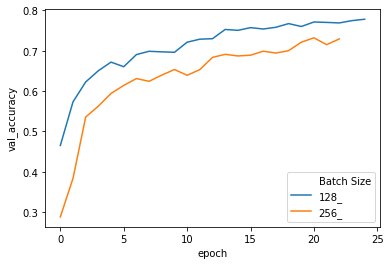

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD, Adam, Nadam

Add hidden layers to make the model more complex

In [ ]:
# Function to create model, required for KerasClassifier
def create_deep_model():
    # create model
    model = Sequential([ 
    Dense(32, input_dim=784, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
    ])
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_deep_model, verbose=0)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [32,64],
              'epochs': [25]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7591625094413758 using {'batch_size': 32, 'epochs': 25}
Means: 0.7591625094413758, Stdev: 0.039288728483843086 with: {'batch_size': 32, 'epochs': 25}
Means: 0.7462499976158142, Stdev: 0.03777087765624838 with: {'batch_size': 64, 'epochs': 25}


In [ ]:
prediction = model.predict(X_test)
prediction[:10]

array([0, 8, 6, 6, 0, 5, 4, 8, 8, 2], dtype=int64)

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


